<a href="https://colab.research.google.com/github/axelbynne/VISIONARTIFICIAL/blob/main/Procesamiento_del_histograma_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import files
uploaded = files.upload()


Saving 1003.png to 1003.png
Saving 1005.png to 1005.png
Saving 1006.png to 1006.png
Saving 1001.png to 1001.png


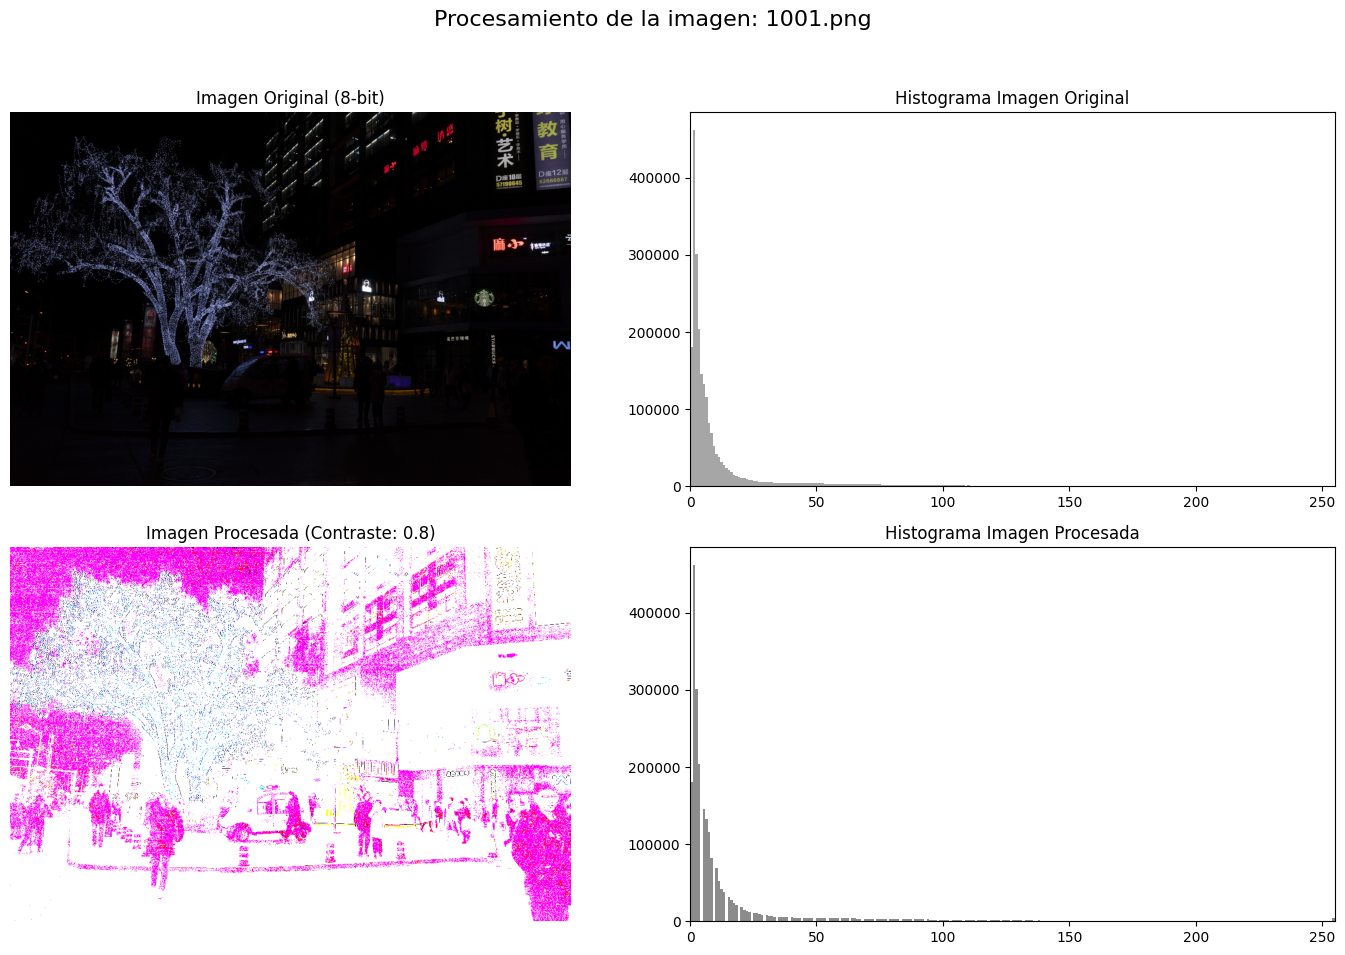

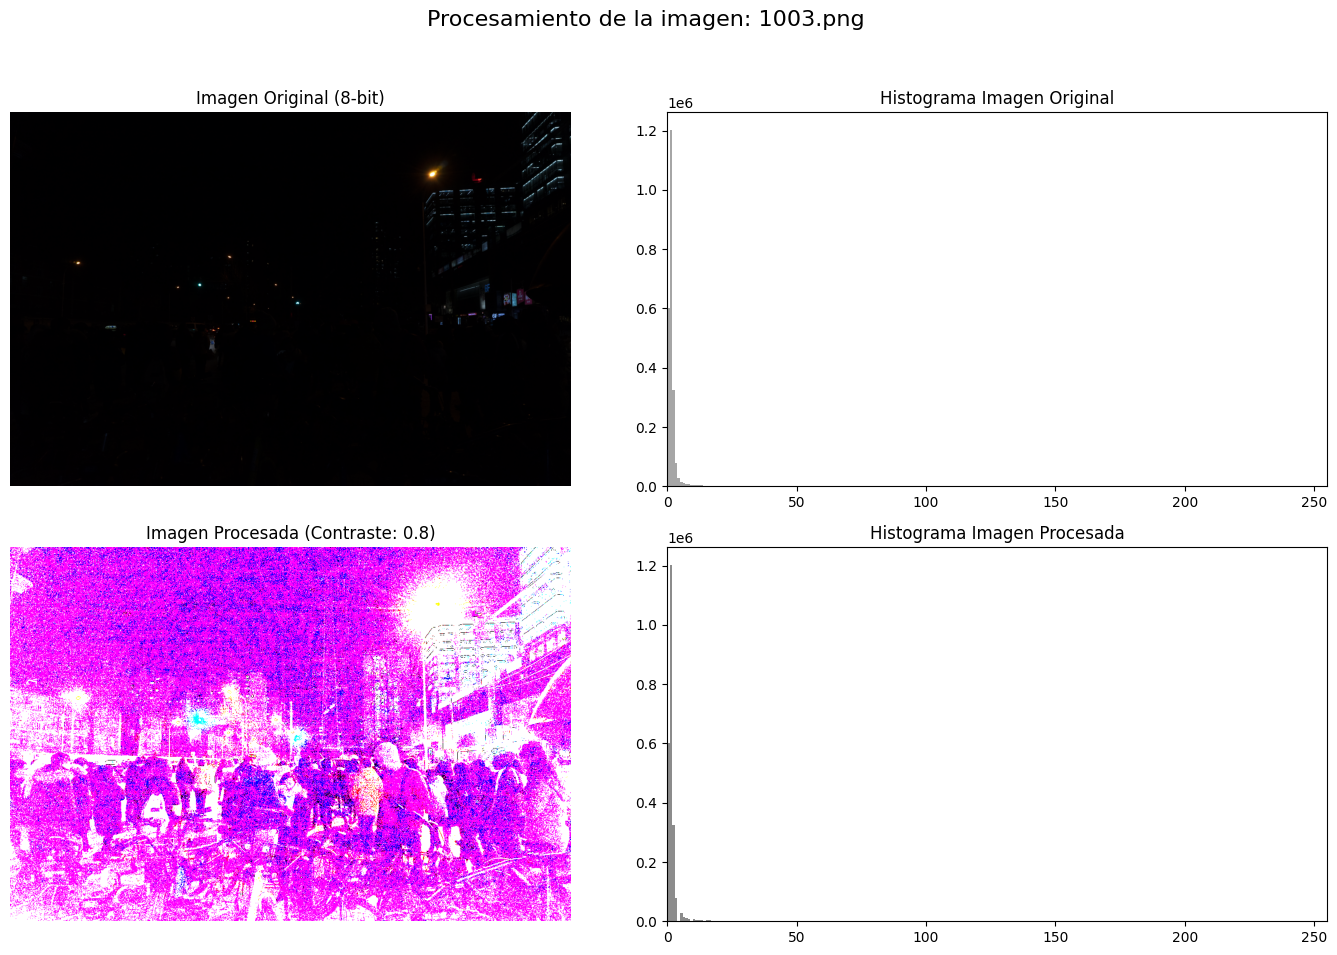

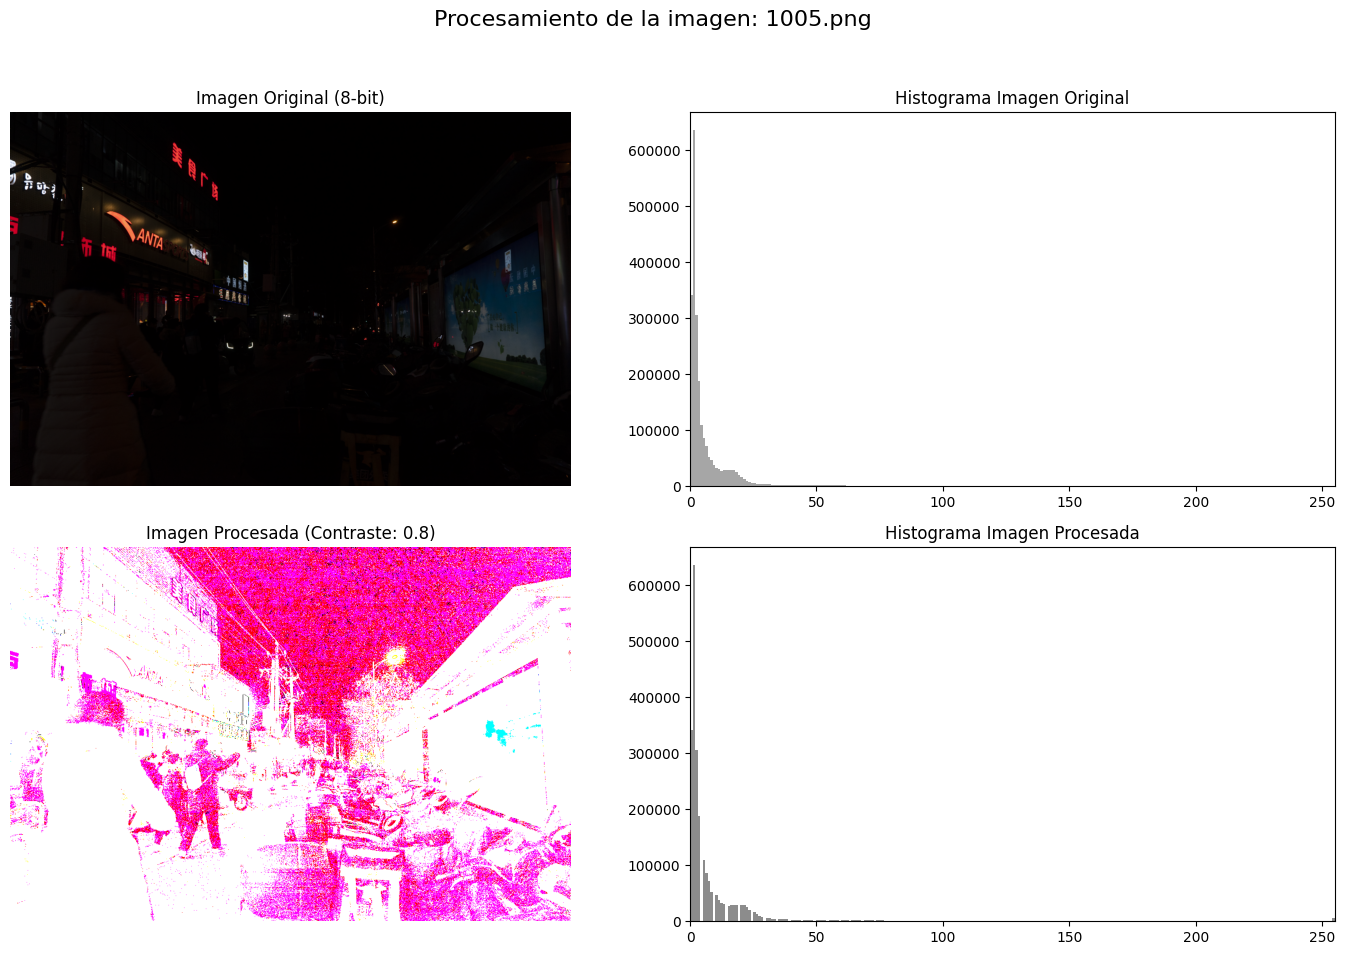

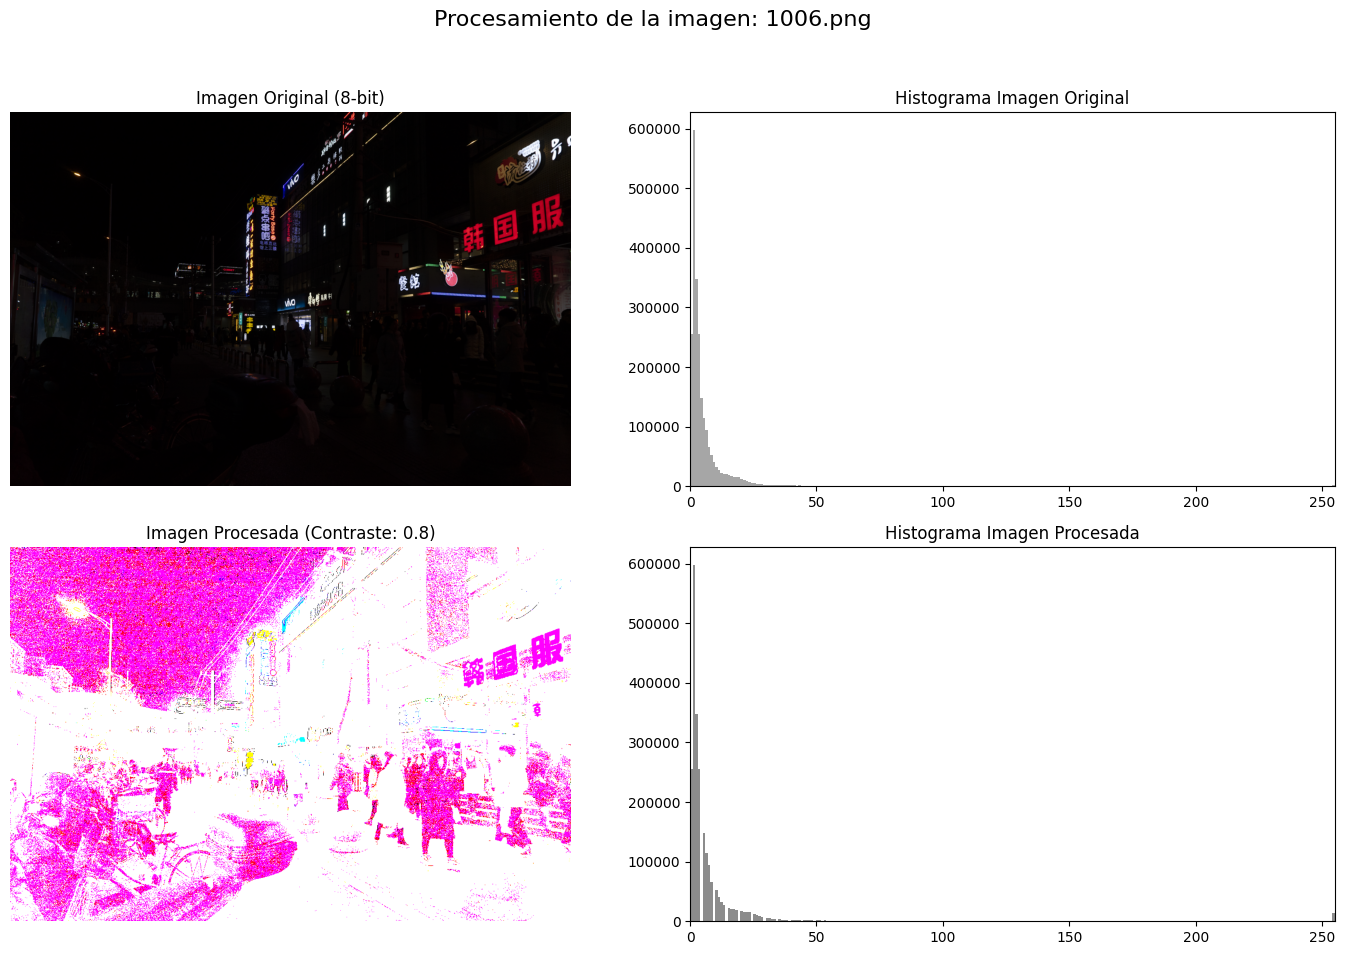

In [8]:
from skimage.io import imread
from skimage import img_as_ubyte, img_as_float
from skimage.exposure import rescale_intensity
import matplotlib.pyplot as plt

# Lista de imágenes cargadas manualmente
imagenes = ['1001.png', '1003.png', '1005.png', '1006.png']

contrast_level = 0.8

for image_name in imagenes:
    image = img_as_float(imread(image_name))
    image_8bit = img_as_ubyte(image)

    processed_image = rescale_intensity(
        image_8bit,
        in_range=(image_8bit.min(), image_8bit.max() * contrast_level),
        out_range=(0, 255)
    )

    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle(f'Procesamiento de la imagen: {image_name}', fontsize=16)

    axes[0, 0].imshow(image_8bit, cmap='gray')
    axes[0, 0].set_title("Imagen Original (8-bit)")
    axes[0, 0].axis("off")

    axes[0, 1].hist(image_8bit.ravel(), bins=256, color='gray', alpha=0.7)
    axes[0, 1].set_title("Histograma Imagen Original")
    axes[0, 1].set_xlim(0, 255)

    axes[1, 0].imshow(processed_image, cmap='gray')
    axes[1, 0].set_title(f"Imagen Procesada (Contraste: {contrast_level})")
    axes[1, 0].axis("off")

    axes[1, 1].hist(processed_image.ravel(), bins=256, color='gray', alpha=0.9)
    axes[1, 1].set_title(f"Histograma Imagen Procesada")
    axes[1, 1].set_xlim(0, 255)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


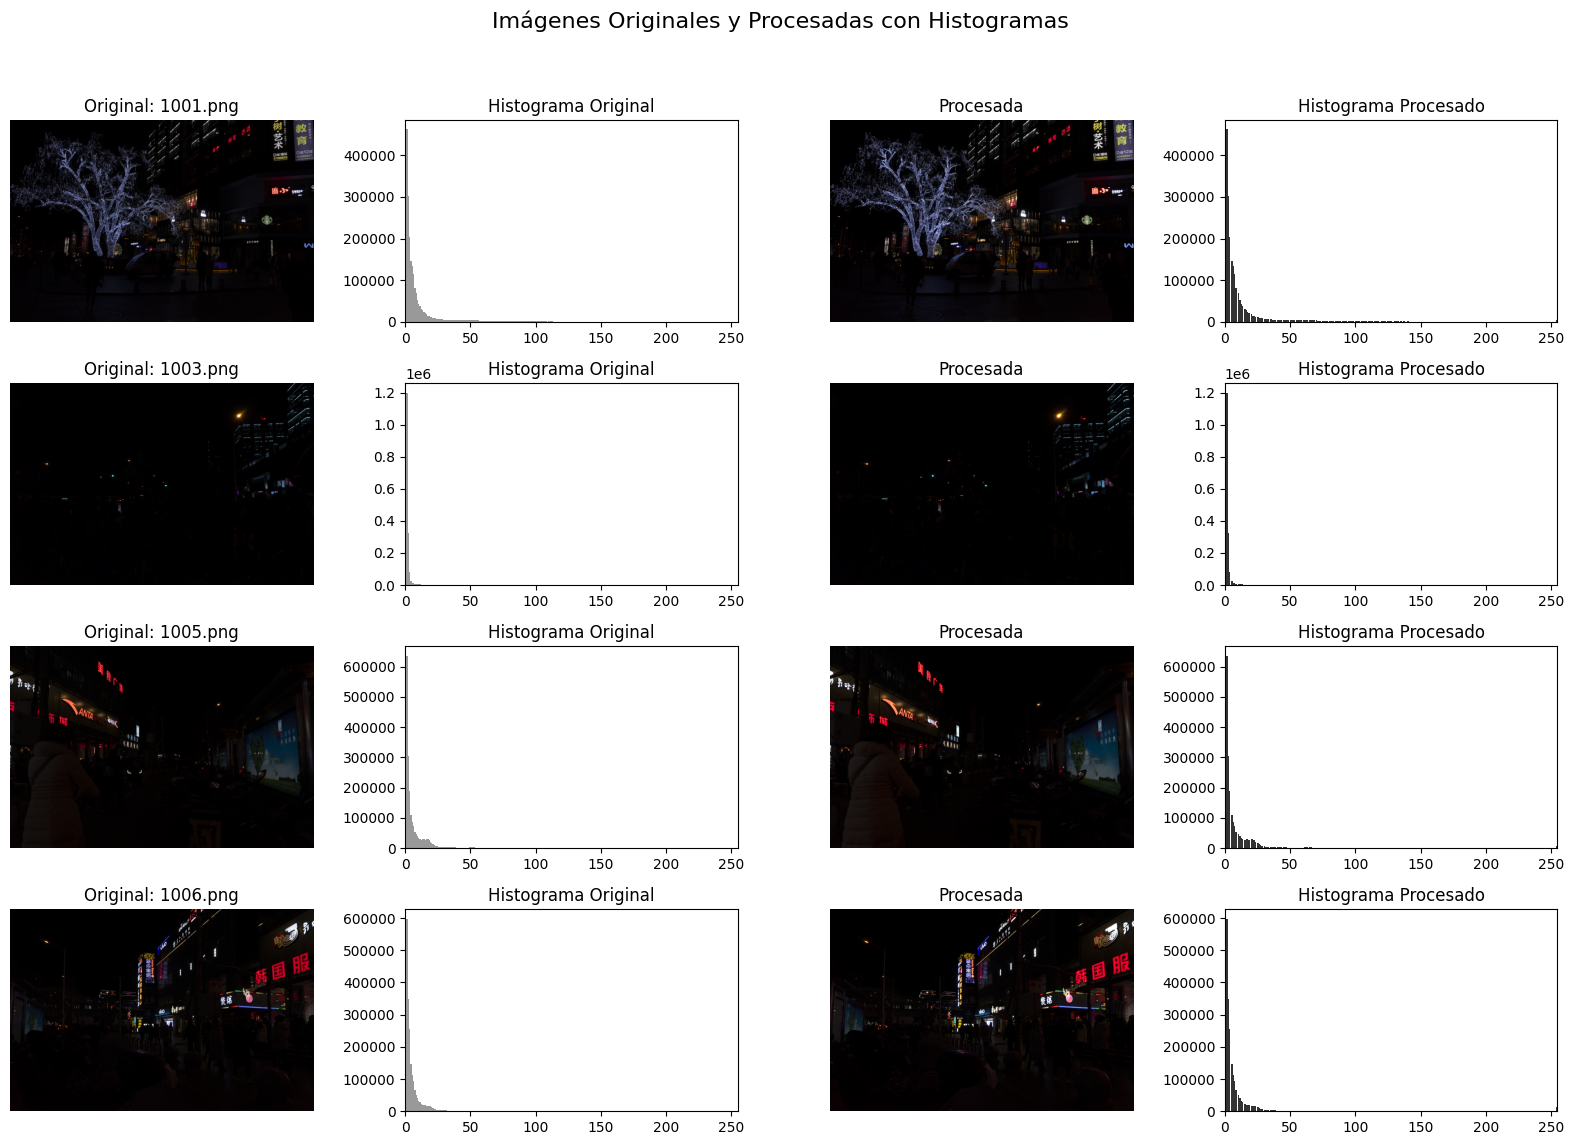

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage import img_as_float, img_as_ubyte
from skimage.exposure import rescale_intensity

# Lista de nombres de imágenes cargadas
imagenes = ['1001.png', '1003.png', '1005.png', '1006.png']
ruta = "."  # Usar el directorio actual

# Nivel de contraste ajustable
contrast_level = 0.8

# Crear figura grande para mostrar todas las imágenes y sus histogramas
fig, axes = plt.subplots(len(imagenes), 4, figsize=(16, 12))
fig.suptitle("Imágenes Originales y Procesadas con Histogramas", fontsize=16)

for i, nombre in enumerate(imagenes):
    image_path = os.path.join(ruta, nombre)

    if os.path.exists(image_path):
        # Cargar y convertir imagen
        image = img_as_float(imread(image_path))
        image_8bit = img_as_ubyte(image)

        # Procesar imagen: aumentar contraste
        processed_image = rescale_intensity(
            image_8bit,
            in_range=(image_8bit.min(), image_8bit.max() * contrast_level),
            out_range=(0, 255)
        ).astype(np.uint8)

        # Mostrar imagen original
        axes[i, 0].imshow(image_8bit, cmap='gray')
        axes[i, 0].set_title(f"Original: {nombre}")
        axes[i, 0].axis("off")

        # Histograma original
        axes[i, 1].hist(image_8bit.ravel(), bins=256, color='gray', alpha=0.8)
        axes[i, 1].set_title("Histograma Original")
        axes[i, 1].set_xlim(0, 255)

        # Imagen procesada
        axes[i, 2].imshow(processed_image, cmap='gray')
        axes[i, 2].set_title("Procesada")
        axes[i, 2].axis("off")

        # Histograma procesado
        axes[i, 3].hist(processed_image.ravel(), bins=256, color='black', alpha=0.8)
        axes[i, 3].set_title("Histograma Procesado")
        axes[i, 3].set_xlim(0, 255)

    else:
        for j in range(4):
            axes[i, j].axis("off")
        axes[i, 0].text(0.5, 0.5, f"⚠️ No se encontró:\n{nombre}", ha='center', va='center', fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



